# Example of swb output munging with Python

This example shows how one can perform simple data extraction and summary tasks with xarray and a companion package xarray-spatial using the Python language. 'xarray-spatial' is relatively new; I've installed both using a Python 3.7 distribution of Miniconda3, installing both xarray and xarray-spatial with 'conda install -c conda-forge xarray xrspatial'.

In [1]:
import xarray as xr
import xrspatial as xrs

The datasets we'll use here consist of a swb2 output file containing gross precipitation values, and a zone file giving the land use code for each swb model gridcell.

In [2]:
datapath         = "../data/"
netcdf_file      = "gross_precipitation__2012-01-01_to_2013-12-31__173_by_200.nc"
zone_file        = "Landuse_land_cover__as_read_into_SWB.asc"

/Users/smwesten/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


xarray can open the swb output ARC ASCII file with the 'open_rasterio' function.

In [3]:
precip_ds = xr.open_dataset(datapath + netcdf_file)
zone_da   = xr.open_rasterio(datapath + zone_file)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


The structure of the netCDF output file is shown below:

In [4]:
precip_ds

/Users/smwesten/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.Dataset>
Dimensions:              (time: 731, x: 200, y: 173)
Coordinates:
  * time                 (time) datetime64[ns] 2012-01-01 ... 2013-12-31
  * y                    (y) float64 4.632e+05 4.631e+05 ... 4.325e+05 4.323e+05
  * x                    (x) float64 5.454e+05 5.456e+05 ... 5.81e+05 5.812e+05
    lat                  (y, x) float64 ...
    lon                  (y, x) float64 ...
Data variables:
    gross_precipitation  (time, y, x) float32 ...
    crs                  int32 ...
Attributes:
    source:              gross_precipitation output from SWB run started on A...
    executable_version:  version 2.0, build 1060, Git branch: master, Git com...
    conventions:         CF-1.6
    history:             Aug 03 2020 15:30:29: Soil-Water-Balance run started.

xarray makes it pretty easy to create summarizations for arbitrary subsets of the dataset. The example below creates subsamples of the daily output for each month in the simulation, then sums the daily values for each subsample, to yield a time series of monthly summed precipitation grids.

In [5]:
monthly_precip = precip_ds.gross_precipitation.resample(time="1MS", restore_coord_dims=True).sum(dim='time')

In [6]:
monthly_precip

/Users/smwesten/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.DataArray 'gross_precipitation' (time: 24, y: 173, x: 200)>
array([[[1.062992  , 1.062992  , 1.062992  , ..., 0.94488186,
         0.94488186, 0.94488186],
        [1.062992  , 1.062992  , 1.062992  , ..., 0.94488186,
         0.94488186, 0.94488186],
        [1.062992  , 1.062992  , 1.062992  , ..., 0.94488186,
         0.94488186, 0.94488186],
        ...,
        [1.2204723 , 1.2204723 , 1.2204723 , ..., 1.0629921 ,
         1.0629921 , 1.0629921 ],
        [1.2204723 , 1.2204723 , 1.2204723 , ..., 1.0629921 ,
         1.0629921 , 1.0629921 ],
        [1.2204723 , 1.2204723 , 1.2204723 , ..., 1.0629921 ,
         1.0629921 , 1.0629921 ]],

       [[1.0629921 , 1.0629921 , 1.0629921 , ..., 1.2992126 ,
         1.2992126 , 1.2992126 ],
        [1.0629921 , 1.0629921 , 1.0629921 , ..., 1.2992126 ,
         1.2992126 , 1.2992126 ],
        [1.0629921 , 1.0629921 , 1.0629921 , ..., 1.2992126 ,
         1.2992126 , 1.2992126 ],
...
        [2.4015746 , 2.4015746 , 2.4015746 , ..., 3.1102362 ,
         3.1102362 , 3.2283463 ],
        [2.4015746 , 2.4015746 , 2.4015746 , ..., 3.1102362 ,
         3.1102362 , 3.2283463 ],
        [2.4015746 , 2.4015746 , 2.4015746 , ..., 3.1102362 ,
         3.1102362 , 3.2283463 ]],

       [[1.4566928 , 1.4566928 , 1.4566928 , ..., 1.6141733 ,
         1.6141733 , 1.6141733 ],
        [1.4566928 , 1.4566928 , 1.4566928 , ..., 1.6141733 ,
         1.6141733 , 1.6141733 ],
        [1.4566928 , 1.4566928 , 1.4566928 , ..., 1.6141733 ,
         1.6141733 , 1.6141733 ],
        ...,
        [1.4960629 , 1.4960629 , 1.4960629 , ..., 1.7716535 ,
         1.7716535 , 1.7716535 ],
        [1.4960629 , 1.4960629 , 1.4960629 , ..., 1.7716535 ,
         1.7716535 , 1.7716535 ],
        [1.4960629 , 1.4960629 , 1.4960629 , ..., 1.7716535 ,
         1.7716535 , 1.7716535 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 2012-02-01 ... 2013-12-01
  * y        (y) float64 4.632e+05 4.631e+05 4.629e+05 ... 4.325e+05 4.323e+05
  * x        (x) float64 5.454e+05 5.456e+05 5.458e+05 ... 5.81e+05 5.812e+05
    lat      (y, x) float64 44.64 44.64 44.64 44.64 ... 44.36 44.36 44.36 44.36
    lon      (y, x) float64 -89.68 -89.68 -89.68 -89.67 ... -89.24 -89.23 -89.23

The zone grid has a provision to track the 'band' number as well as the x and y coordinates. In this case, there is only a single band (band 1, or index 0). Providing the index number as shown below effectively reduces the number of dimensions from 3 to 2:

In [7]:
zone_da[0]

<xarray.DataArray (y: 173, x: 200)>
array([[141, 141, 141, ..., 141, 190, 190],
       [141,  37,   1, ..., 141, 141, 141],
       [141, 141, 141, ..., 141, 141,   1],
       ...,
       [  5,   1, 176, ..., 141,   1,   5],
       [ 36,   1, 176, ..., 141, 176, 141],
       [ 36,   1,  36, ..., 141, 141, 141]], dtype=int32)
Coordinates:
    band     int64 1
  * y        (y) float64 4.632e+05 4.631e+05 4.629e+05 ... 4.325e+05 4.323e+05
  * x        (x) float64 5.454e+05 5.456e+05 5.458e+05 ... 5.81e+05 5.812e+05
Attributes:
    transform:   (180.0, 0.0, 545300.0, 0.0, -180.0, 463340.0)
    res:         (180.0, 180.0)
    is_tiled:    0
    nodatavals:  (-9999.0,)
    scales:      (1.0,)
    offsets:     (0.0,)

The zone grid in this case is a grid describing the land use codes attributable to each cell in the associated swb model simulation.

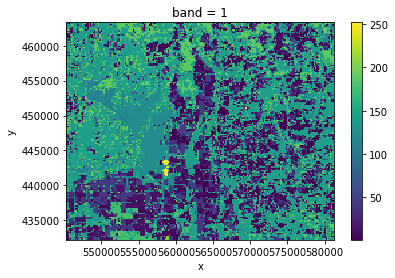

In [8]:
zone_da[0].plot()

The summarized monthly precipitation value grids may be accessed by providing an index number. In the case below, index value '3' corresponds with the summed precipitation for April, 2012:

/Users/smwesten/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


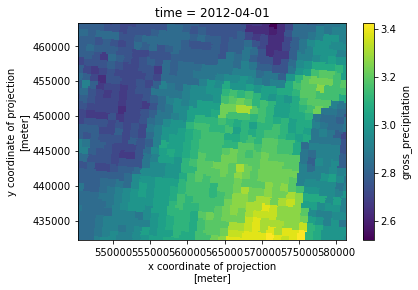

In [9]:
monthly_precip[3].plot()

Zonal statistics may be calculated by using xarray-spatial's 'zonal_stats' function. The example below shows the data frame resulting from a call to 'zonal_stats'.

In [10]:
zone_vals_df = xrs.zonal_stats(zones=zone_da[0], values=monthly_precip[3])

In [11]:
zone_vals_df

,mean,max,min,std,var,count
1,3.039865,3.425197,2.519685,1.740063e-01,3.027818e-02,5029.0
4,3.018373,3.228347,2.795275,1.536051e-01,2.359453e-02,6.0
5,2.957729,3.385827,2.598425,1.629328e-01,2.654710e-02,657.0
12,2.993847,3.385827,2.637795,1.289489e-01,1.662782e-02,1464.0
21,3.000000,3.110236,2.913386,7.428344e-02,5.518029e-03,10.0
23,2.742782,2.834646,2.598425,1.033334e-01,1.067779e-02,3.0
24,2.981102,3.228347,2.755905,1.487836e-01,2.213655e-02,75.0
26,2.992126,2.992126,2.992126,0.000000e+00,0.000000e+00,1.0
27,2.972657,3.385827,2.598425,2.003559e-01,4.014250e-02,91.0
28,3.076831,3.385827,2.755905,1.673482e-01,2.800541e-02,33.0


The basic strategies outlined above can be expanded and modified to provide annual statistics or statistics for specific time slices.